# Posteriors

1. The posteriors are well formed
1. Recast the mode frequency resuts in terms of the mass and spin of the remnant
    1. If computing the mass and spin given the QNM frequency is difficult, express the QNM model in terms of the mass and spin. 
1. Compute the QLM mass and spins of the remnant
1. Campare the two.
1. Given the higher order QNM mode, construct a two mode QNM model.
1. Should the second mode be an overtone or a higher harmonic? 
1. Compute evidences for the two-mode fit vs a single mode fit. 
1. Plot a Q transform of the residue
1. Is there a way to assign a residual SNR to the residual data over the gaissian noise?
1. Is there a test of the Gaissian process?

In [1]:
%%bash
df -h .

Filesystem      Size  Used Avail Use% Mounted on
beegfs_nodev    175T  161T   15T  92% /mnt/pfs


In [2]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import numpy as np

import gwpy
print(gwpy.__version__)

import matplotlib.pyplot as plt

3.0.8


In [3]:
%%bash
hostname

sonic13


In [4]:
from gwosc.datasets import event_gps

gps0 = event_gps('GW150914') + 10
print(gps0)

1126259472.4


In [5]:
segment0 = (int(gps0)-0.2, int(gps0)+0.2)

In [6]:
print(segment0)

(1126259471.8, 1126259472.2)


In [7]:
sf = 4096

In [8]:
from gwpy.timeseries import TimeSeries
#ldata0 = TimeSeries.fetch_open_data('L1', *segment0, verbose=True)

# data_file_name = "Entire_noise_ts_gpsT1126259462_R200_D8_S4096_A1.txt"
data_file_name = "Entire_noise_ts_gpsT1126259462_R512_D16_S4096_A0.5.txt"

req_duration = 30

ldata0f = TimeSeries.read(data_file_name)[:req_duration*sf]

In [9]:
N0 = len(ldata0f)
#N1 = len(ldata1)

N0#, N1

122880

In [10]:
N0/4096

30.0

In [11]:
# ldata1.write("GW150914_af_16s.txt")

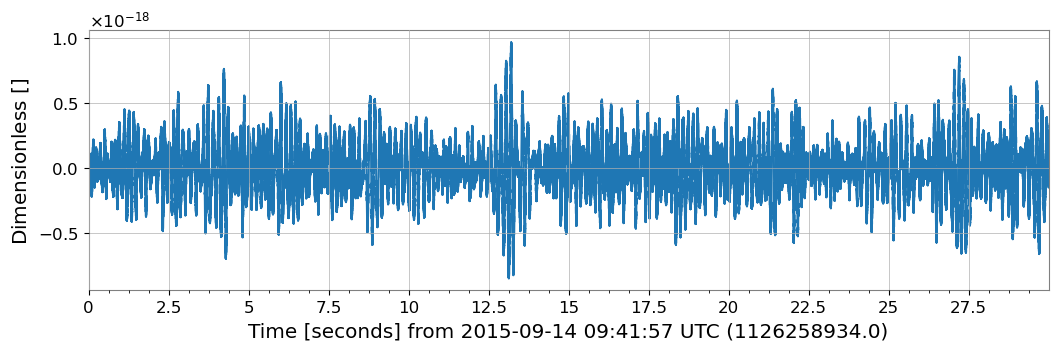

In [12]:
plot0 = ldata0f.plot()

In [13]:
np.mean(ldata0f)

<Quantity -1.83237903e-22>

In [14]:
ldata0f.times[-1] - ldata0f.times[0]

<Quantity 29.99975586 s>

In [15]:
#Cij_file_name = "Cij_gpsT1126259462_R200_D8_S4096_A1.npy"
Cij_file_name = f"Cij_gpsT1126259462_R512_D16_S4096_A0.5_N1000.npy"

In [16]:

Cij = np.load(Cij_file_name)

In [17]:
Cij.shape

(2048, 2048)

In [18]:
np.linalg.det(Cij)

0.0

In [19]:
Lij = np.linalg.cholesky(Cij)

In [20]:
Lij

array([[ 2.37623841e-19,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.35919972e-19,  2.84052213e-20,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.32542630e-19,  4.22020701e-20,  2.46576620e-20, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.42669274e-20,  6.69183323e-21,  1.78247246e-20, ...,
         1.82855441e-21,  0.00000000e+00,  0.00000000e+00],
       [ 2.52560569e-20, -6.75959335e-21,  1.32735524e-20, ...,
         1.69964783e-21,  1.82855393e-21,  0.00000000e+00],
       [ 2.68309285e-20, -1.15651499e-20,  6.13971025e-22, ...,
         1.31506631e-21,  1.69964938e-21,  1.82855185e-21]])

In [21]:
inv_Lij = np.linalg.inv(Lij)

In [24]:
inv_Cij = np.linalg.inv(Cij)

In [19]:
np.save(f"inj{Cij_file_name}", inv_Cij)

In [16]:
inv_Cij = np.load(f"inj{Cij_file_name}")

In [45]:
inv_Cij@Cij

array([[ 1.00000000e+00, -2.06362579e-13, -5.33462407e-13, ...,
         2.64251568e-11,  2.59874371e-11,  2.83680876e-11],
       [ 7.69229926e-11,  1.00000000e+00,  7.47588940e-11, ...,
         4.25431493e-11,  4.27627483e-11,  3.58207181e-11],
       [-2.31152077e-10, -2.28300613e-10,  1.00000000e+00, ...,
        -2.14973524e-10, -2.13604918e-10, -2.05746101e-10],
       ...,
       [ 1.17015026e-13, -7.21089984e-13,  3.50142201e-13, ...,
         1.00000000e+00, -2.23477593e-12,  2.42200000e-14],
       [-1.22140678e-13, -2.89554951e-13, -4.33305691e-13, ...,
         2.23893255e-12,  1.00000000e+00, -1.00985292e-12],
       [ 8.22405528e-13,  3.91997224e-13,  9.85976572e-13, ...,
         5.24760552e-13,  1.85707139e-12,  1.00000000e+00]])

In [23]:
Lij@inv_Lij

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.06362905e-16,  1.00000000e+00,  1.09544348e-15, ...,
         1.91687629e-16, -1.97448622e-16,  0.00000000e+00],
       [-2.41405111e-15, -2.34007211e-15,  1.00000000e+00, ...,
         1.04894714e-17, -3.02259503e-17,  0.00000000e+00],
       ...,
       [-5.07398040e-16, -2.52985683e-15, -1.64351453e-15, ...,
         1.00000000e+00, -5.73199630e-17,  0.00000000e+00],
       [-1.85763179e-15, -2.71814348e-16, -2.78210718e-15, ...,
        -3.46532574e-17,  1.00000000e+00,  0.00000000e+00],
       [-8.10703325e-16,  2.74988718e-15, -3.18506410e-15, ...,
        -7.26649850e-16,  1.11758579e-16,  1.00000000e+00]])

# Inject a damped sinusoid in the noise

In [22]:
time_axis = np.array(ldata0f.times) - np.array(ldata0f.times)[0]

In [23]:
ans_dur = 0.5

In [24]:
time_axis[40]

0.009765625

In [25]:
full_data = ldata0f

In [26]:
len(time_axis)

122880

In [27]:
250

250

In [28]:
def whiten(x):

    return np.dot(inv_Lij, x)

def inner_product(x, y):

    xbar = whiten(x)
    ybar = whiten(y)

    return np.dot(xbar, ybar)

# Load signal for injection

In [29]:
signal_data = np.genfromtxt("shear_dimf_q0p5a0_M119.762630640002.txt")

shear_t = signal_data[:-1, 0]
shear_p = signal_data[:-1, 1]
shear_x = signal_data[:-1, 2]

delta_t_orig = shear_t[1] - shear_t[0]

orig_dur = shear_t[-1] - shear_t[0]

deficit = ans_dur - orig_dur 

to_add = (deficit/delta_t_orig)

print("Length of the original shear dat is ", len(shear_t))
print("delta_t original is ", delta_t_orig)
print("N to add is ", to_add)

Length of the original shear dat is  2048
delta_t original is  0.000244140625
N to add is  1.0


In [30]:
signal_data.shape

(2049, 3)

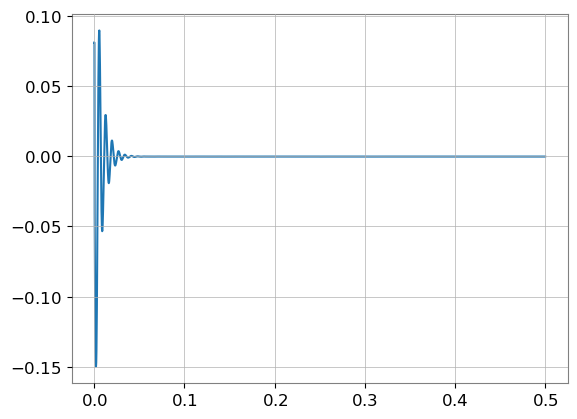

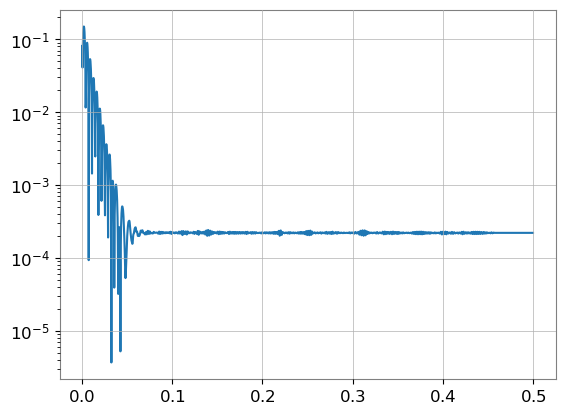

Shear original sampling frequency is  4096.0


In [31]:

meanp = np.mean(shear_p[-50:])
meanx = np.mean(shear_x[-50:])
#meanp = np.mean(shear_p[300:450])

#shear_p -= meanp
#shear_x #-= np.mean(shear_x[-100:])

ans_nsam = int(sf*ans_dur)




if to_add>0:

    shear_t = np.linspace(0, ans_dur, ans_nsam)
    ones = np.ones(ans_nsam - len(shear_t))

    shear_p = np.array( list(shear_p) + list(meanp*ones) )
    shear_x = np.array( list(shear_x) + list(meanx*ones) )


plt.plot(shear_t, shear_p)
plt.show()

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(shear_t, abs(shear_p))
plt.show()

shear_sf = len(shear_t)/ans_dur
print('Shear original sampling frequency is ', shear_sf)

In [32]:
target_sf = sf
print(target_sf)

4096


In [33]:
shear_t[-2]

0.49975574010747437

In [34]:
#shear_t_re = np.linspace(0, shear_t[-1], target_sf)

## Resample to required frequency

In [35]:
#from scipy.interpolate import interp1d

#shear_p_int = interp1d(shear_t, shear_p)

#shear_p_re = shear_p_int(shear_t_re)


#shear_x_int = interp1d(shear_t, shear_x)
#shear_x_re = shear_x_int(shear_t_re)


#fig, ax = plt.subplots()
#ax.set_yscale('log')
#ax.plot(shear_t, abs(shear_p))
#ax.scatter(shear_t_re, abs(shear_p_re),s=5, c='red')
#ax.set_xlim(0, 0.025)
#plt.show()

In [36]:
t_start = 8

nzeros_before = np.zeros(t_start*sf)
nzeros_after = np.zeros(int((req_duration-t_start - ans_dur)*sf))

raw_signal = np.array(list(nzeros_before) + list(shear_p) + list(nzeros_after))

In [37]:
t_start

8

In [38]:
len(signal), ans_dur

NameError: name 'signal' is not defined

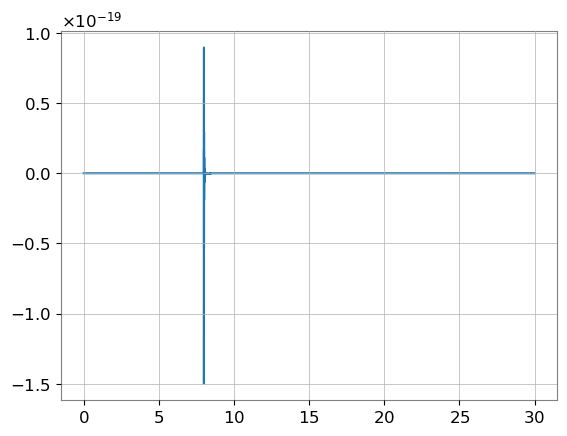

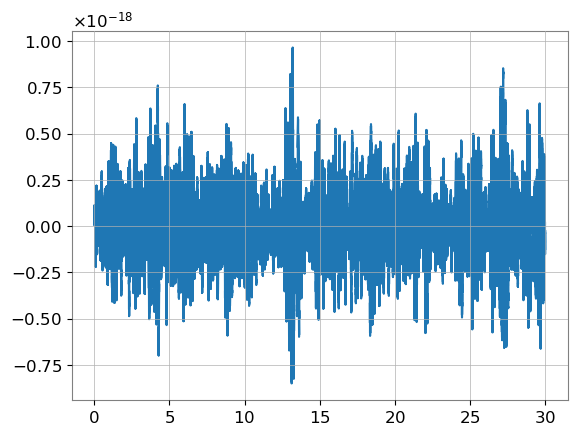

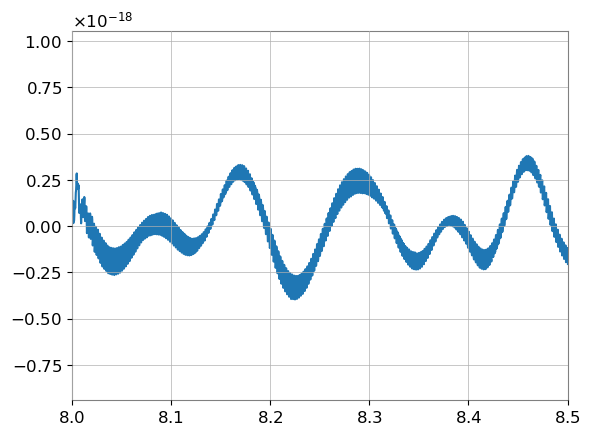

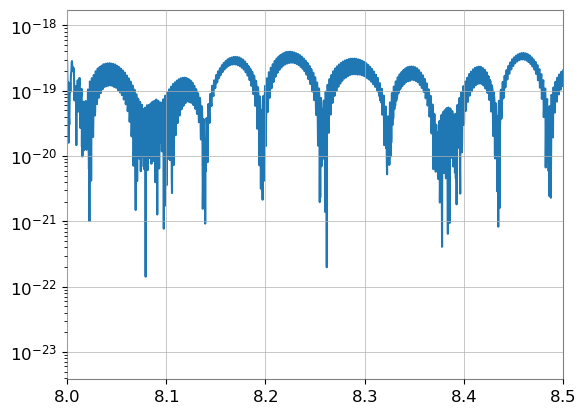

Matched filter SNR 109.42012839646208


In [39]:

#time_axis_0 = time_axis[req_duration*sf:(req_duration+1)*sf]
A0 = 1e-18

signal = A0*raw_signal

analysis_data = full_data  + signal - np.mean(full_data)

plt.plot(time_axis, signal)
#plt.xlim(t_start, t_start+ans_dur)
#plt.ylim(-2e-21, 2e-21)
plt.show()


plt.plot(time_axis, full_data)
#plt.xlim(t_start, t_start+ans_dur)
#plt.ylim(-2e-21, 2e-21)
plt.show()

plt.plot(time_axis, analysis_data)
plt.xlim(t_start, t_start+(ans_dur))
#plt.ylim(-2e-21, 2e-21)
plt.show()


plt.semilogy(time_axis, abs(analysis_data))
plt.xlim(t_start, t_start+(ans_dur))
#plt.ylim(-2e-21, 2e-21)
plt.show()

data_seg = analysis_data[t_start*sf: t_start*sf + int(ans_dur*sf)]
signal_seg = signal[t_start*sf: t_start*sf + int(ans_dur*sf)]
time_seg = time_axis[t_start*sf: t_start*sf + int(ans_dur*sf)]

#signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)
signal_seg_norm = inner_product(signal_seg, signal_seg)

#signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)

#data_sig_inner_prod = np.dot(data_seg, inv_Cij@signal_seg)
data_sig_inner_prod = inner_product(data_seg, signal_seg)

mf_snr = data_sig_inner_prod/np.sqrt(signal_seg_norm)

print('Matched filter SNR', mf_snr)


In [40]:
analysis_data = np.array(analysis_data)

In [41]:
omega0 = 0
gamma0 = 0
t0 = t_start
phi0 = 0

In [42]:
x0 = np.array([A0, omega0, gamma0, t0, phi0])

In [43]:
def TimeDomainLogLiklihood(dx):

    #A, omega, gamma, t0, phi0 = x
    # A, omega, gamma, phi = x
    # omega, gamma, t = x
    # dA, domega, dgamma, dt, dphi = dx
    dA, domega, dgamma, dphi = dx
    #dA = 0
    dt = 0
    #dphi = 0
    
    #t = t0
    # print(f"A {A}, omega {omega}, gamma {gamma}, t0 {t0}, phi0 {phi0}")
    
    # X0 = 
    A = A0 +dA
    omega = omega0 + domega
    gamma = gamma0+dgamma
    t = t0 + dt
    phi = phi0 + dphi
    
    #xf = x0 + dx

    #t = xf[-2]

    tloc = np.argmin(abs(time_axis-t))
    
    #print(tloc)

    tloc_end = tloc + int(ans_dur*sf)

    data = analysis_data[tloc:tloc_end]
    cdata = data - np.mean(data)

    #print(len(data)/sf)

    local_time_axis = time_axis[tloc:tloc_end]

    #print(len(local_time_axis)/sf)
    
    signal =  A*np.cos(omega*(local_time_axis-t) + phi) * np.exp(-gamma*(local_time_axis-t))

    #signal = signal_generator([A0, omega0, gamma0, t0, phi0])

    #print(len(signal))
    #tend signa= 16*sf
    #print(signal, local_time_axis[tloc])
    #plt.plot(local_time_axis, signal)
    #plt.scatter(local_time_axis, data, s=1, alpha=0.3, c='orange')
    #plt.show()
    #signal = s[tloc:tloc+16*sf]
    
    # print(tloc)
    #print(s[:tloc+10], tloc)

    delta = cdata-signal

    # delta_bar = whiten(delta)

    LnP = (-1/2) * (inner_product(delta, delta))

    return LnP

In [44]:
TimeDomainLogLiklihood([1e-22, 25, 20, 0])

-6328.589890684984

In [45]:
x0

array([1.e-18, 0.e+00, 0.e+00, 8.e+00, 0.e+00])

In [46]:
import numpy as np

# Define the dimensionality of our problem.
ndim = 4


def ptform(u):

    x = np.array(u)

    x[0] = -5e-17 + u[0]*10e-17

    x[1] = u[1]*1000

    x[2] =  u[2]*1000

    x[3] = -np.pi/2 + u[3]*2*np.pi/2
    
    # x[0] = -5e-16 + u[0]*10e-16
    #x[0] = 
    #x[1] =  4 + u[0]*8
    #x[2] =  u[1]*8

    #x[1] = u[1]*25
    # x[1] = -15 + u[1]*30

    # x[2] = -15 + u[2]*30
    #x[2] = u[2]*20
    #x[2] = gps0 +12 + u[2]*6
    #x[3] = gps0 + 0.1 - 8 + u[3]*7
    
    # x[3] = -2.5 + u[3]*5

    # x[4] = -np.pi/2 + u[4]*2*np.pi/2
     
    return x

In [47]:
omega_exp

NameError: name 'omega_exp' is not defined

In [48]:
A0, omega0, gamma0, t0, phi0

(1e-18, 0, 0, 8, 0)

In [53]:
from dynesty import NestedSampler

In [67]:
sampler = NestedSampler(TimeDomainLogLiklihood, ptform, ndim, nlive=100)

In [68]:
sampler.run_nested()

818it [02:24,  1.37s/it, bound: 1033 | nc: 816 | ncall: 158816 | eff(%):  0.515 | loglstar:   -inf < 151.562 <    inf | logz: 141.183 +/-  0.303 | dlogz: 13.546 >  0.109] Traceback (most recent call last):
  File "/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gwpy/lib/python3.12/site-packages/dynesty/dynesty.py", line 910, in __call__
    return self.func(np.asarray(x).copy(), *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_2410855/2575859809.py", line 51, in TimeDomainLogLiklihood
    LnP = (-1/2) * (np.dot((cdata-signal), np.dot(inv_Cij, (cdata-signal))))
                                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt
818it [02:25,  5.62it/s, bound: 1033 | nc: 816 | ncall: 158816 | eff(%):  0.515 | loglstar:   -inf < 151.562 <    inf | logz: 141.183 +/-  0.303 | dlogz: 13.546 >  0.109]

Exception while calling loglikelihood function:
  params: [ 4.50453133e-17  3.03094959e+00  3.34067043e+00 -4.11462843e-01
  5.99708790e-01]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [34]:
import dynesty

In [49]:
from dynesty import DynamicNestedSampler

In [50]:
dsampler = DynamicNestedSampler(TimeDomainLogLiklihood,prior_transform=ptform, ndim=ndim, nlive=500)

In [46]:
dsampler = DynamicNestedSampler.restore("runs/q0p5a0_single_1.h5")

In [52]:
dsampler.run_nested(checkpoint_file="runs/q0p5a0_single_0.h5")

23370it [10:39, 36.54it/s, batch: 7 | bound: 5 | nc: 1 | ncall: 457062 | eff(%):  5.112 | loglstar: -1576.628 < -1570.915 < -1571.765 | logz: -1594.886 +/-  0.134 | stop:  0.853]            


In [47]:
dsampler.run_nested(resume=True)

/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gwpy/lib/python3.12/site-packages/dynesty/dynamicsampler.py:2034: RuntimeWarning: You tried to resume the run that has ended successfully.
This is not supported. No sampling was performed
  warnings.warn(


In [53]:
res = dsampler.results
results = res

/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gw/lib/python3.11/site-packages/dynesty/plotting.py:318: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


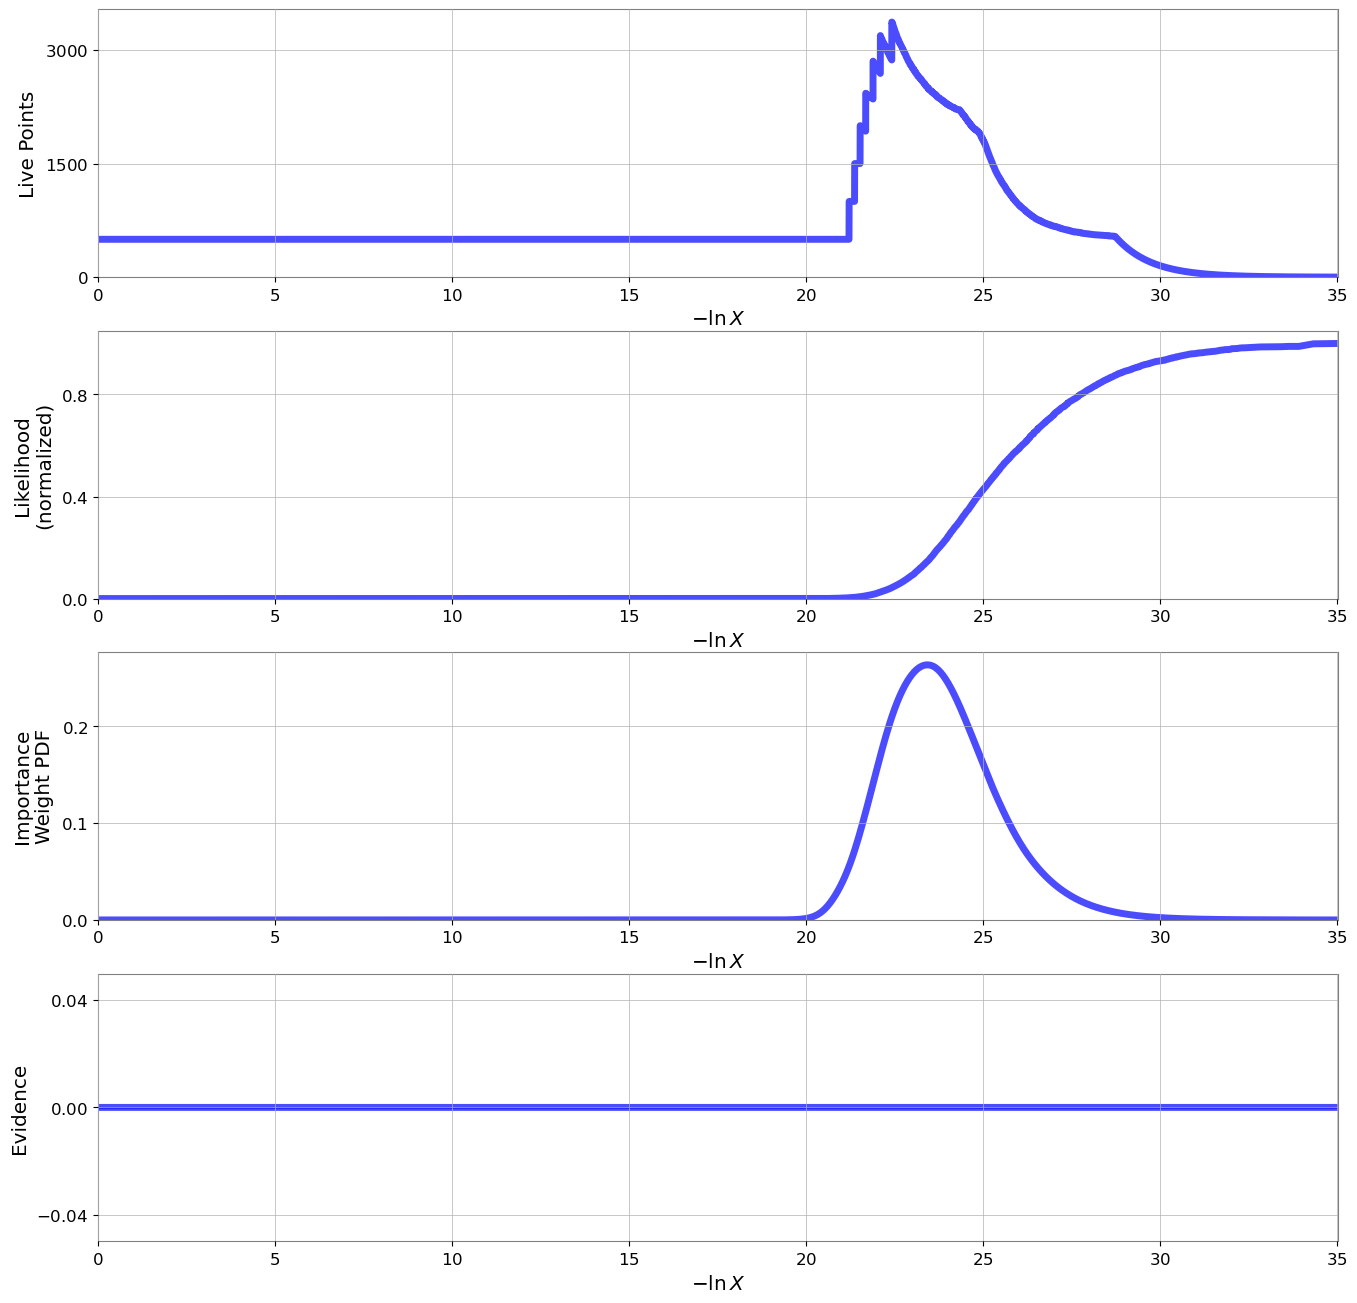

In [54]:
from dynesty import plotting as dyplot

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(res)

In [117]:
results.ev

<bound method Results.summary of          niter: 13764
         ncall: array([1, 1, 1, ..., 1, 1, 1])
           eff: 7.3552358762798455
       samples: array([[-4.60361110e-17,  8.90492042e+02,  2.80346490e+01,
        -9.84618364e-01],
       [-4.33029594e-17,  7.80129482e+02,  3.10510848e+01,
        -7.94112188e-01],
       [-3.87765629e-17,  9.67732870e+02,  4.49901573e+01,
         8.33207556e-01],
       ...,
       [-7.85704357e-19,  8.94222525e+02,  1.55270942e+02,
         1.19904470e+00],
       [-7.86631931e-19,  8.94679641e+02,  1.54598081e+02,
         1.19636294e+00],
       [-7.85756431e-19,  8.94305169e+02,  1.55662277e+02,
         1.19513656e+00]])
    samples_id: array([2238, 2234, 2213, ..., 1888,   19, 1878])
 samples_batch: array([44, 44, 44, ..., 37,  0, 37])
    samples_it: array([12174, 12174, 12174, ..., 10762,  1434, 10776])
     samples_u: array([[0.03963889, 0.89049204, 0.02803465, 0.18658624],
       [0.06697041, 0.78012948, 0.03105108, 0.24722624],
     

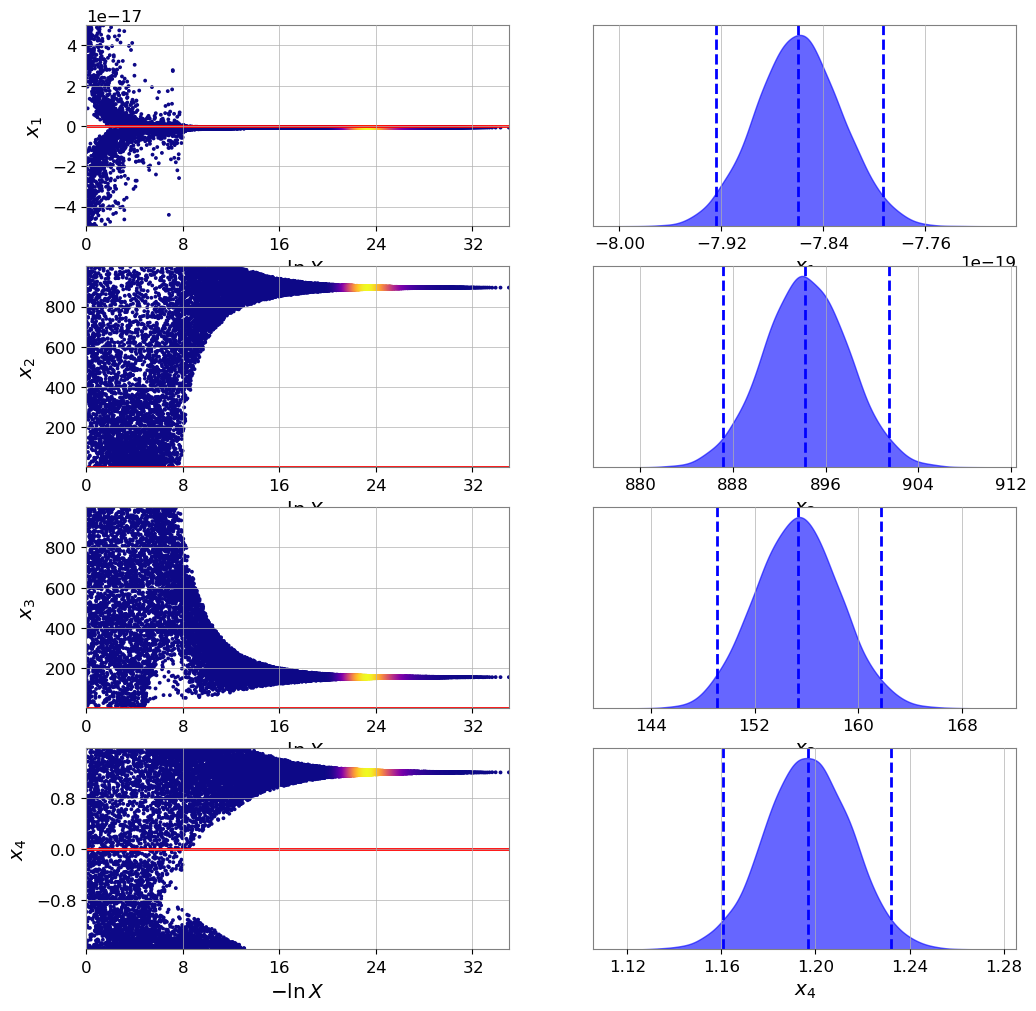

In [55]:
# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(res, truths=[0, 0, 0, 0])

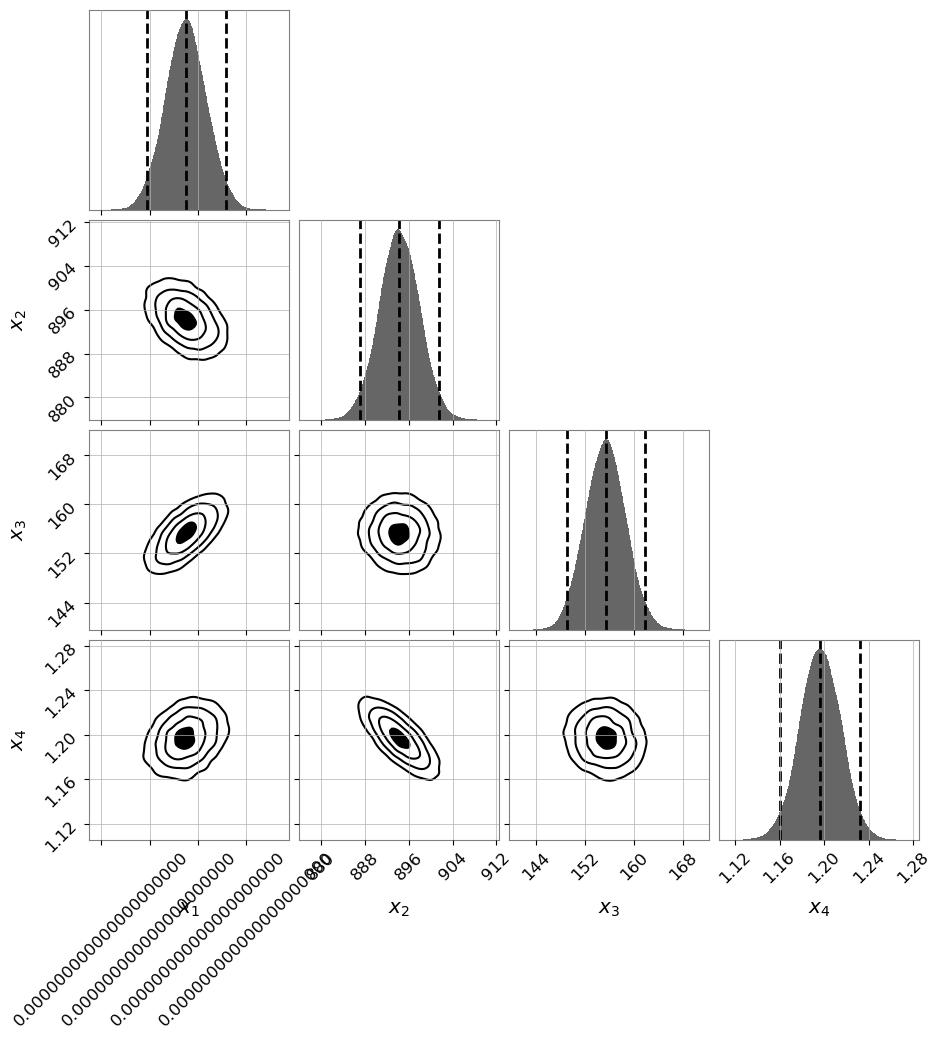

In [56]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(res)#, truths=[0,0,0,0])

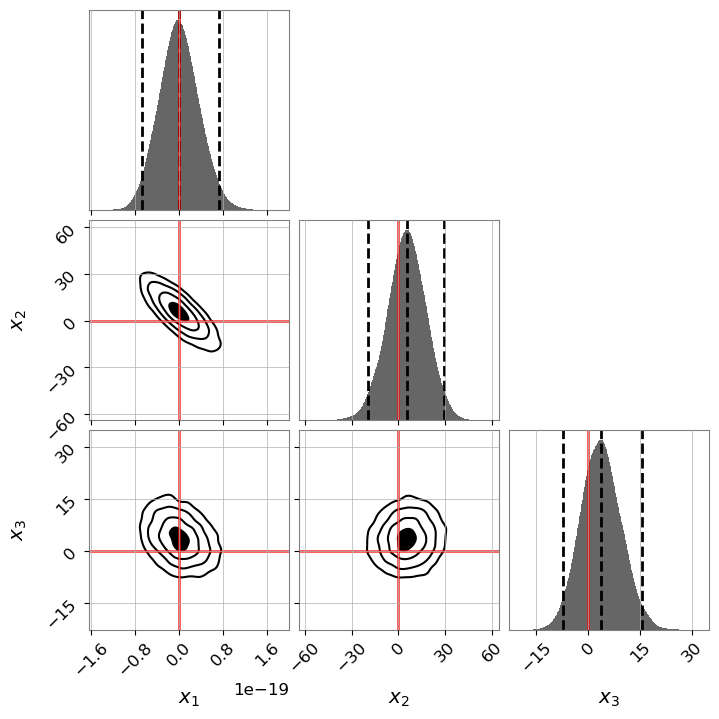

In [130]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(res, truths=[0,0,0])

In [116]:
omega0, gamma0

(250, 250)

In [100]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = results.samples  # samples
weights = results.importance_weights()

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights)
             for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = results.samples_equal()

# Generate a new set of results with sampling uncertainties.
results_sim = dyfunc.resample_run(results)


sigmas = []
for pind in range(ndim):

    sigmas.append(np.sqrt(cov[pind, pind]))

print(mean, " +- ", sigmas) 

[-7.85976853e-19  8.94298141e+02  1.55374664e+02  1.19663016e+00]  +-  [3.3243183202578172e-21, 3.6475351625941212, 3.2324689985840185, 0.018136216895226095]


In [101]:
print(mean, " +- ", sigmas) 

[-7.85976853e-19  8.94298141e+02  1.55374664e+02  1.19663016e+00]  +-  [3.3243183202578172e-21, 3.6475351625941212, 3.2324689985840185, 0.018136216895226095]


1e-18

In [102]:
t0

8

In [84]:
time_seg[0]

1126259360.0

In [106]:
mean

array([4.41788815, 3.75422018])

In [105]:
def get_damped_sinusoid(local_time_axis, pars):

    A, omega, gamma, t, phi = pars

    sig = A*np.cos(omega*(local_time_axis-t) + phi) * np.exp(-gamma*(local_time_axis-t))

    return sig

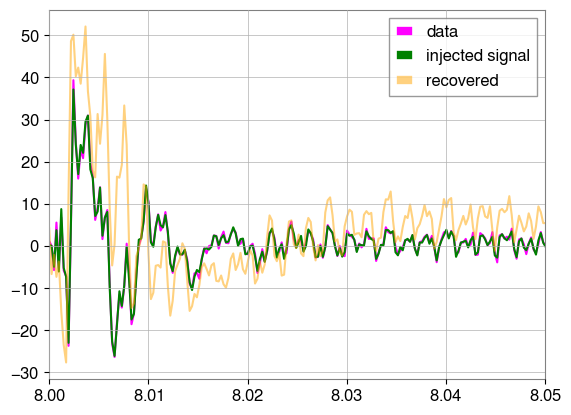

In [115]:
rec_signal_seg = get_damped_sinusoid(time_seg, [A0, omega0 + mean[0], gamma0 + mean[1], t0, phi0])

plt.plot(time_seg, inv_Lij@data_seg, label='data', c='magenta')
plt.plot(time_seg, inv_Lij@signal_seg, label='injected signal', c='green')
#plt.scatter(time_seg, inv_Lij@rec_signal_seg, marker='x', c='orange', label='recovered')
plt.plot(time_seg, inv_Lij@rec_signal_seg, c='orange', label='recovered', alpha=0.5)
plt.legend()
plt.xlim(8, 8.05)
plt.show()

In [226]:
import scipy

In [227]:
np.mean(samples.T*weights)

-3.835724480904094e-06

In [228]:
t0

1126259294.0

In [137]:
1.54898278e+03/(2*np.pi)

246.52826620122585

In [67]:
mean

array([4.41788815, 3.75422018])

In [49]:
x0

NameError: name 'x0' is not defined

In [51]:
mean

array([-1.02596196e-19, -1.17745312e+00,  3.47519253e-02,
       -2.17097859e-01,  1.70983762e-02])

In [53]:
x0

array([1.00000000e-19, 2.70000000e+02, 5.00000000e+01,
       1.12625936e+09, 0.00000000e+00])

In [54]:
mean/x0

/tmp/ipykernel_2546272/317067153.py:1: RuntimeWarning: divide by zero encountered in divide
  mean/x0


array([-1.02596196e+00, -4.36093747e-03,  6.95038505e-04,
       -1.92760093e-10,             inf])

In [115]:
mean[2] - t0

-0.005499124526977539

In [78]:
cov

array([[ 1.05514598e-34, -5.15381450e-19, -4.18746220e-20,
         4.21599871e-19, -1.29365460e-18],
       [-5.15381450e-19,  3.34527585e+01, -8.10469897e-01,
         5.05175687e-03, -1.95935039e-01],
       [-4.18746220e-20, -8.10469897e-01,  7.19377876e+00,
         1.49118873e-03, -2.83245980e-03],
       [ 4.21599871e-19,  5.05175687e-03,  1.49118873e-03,
         2.42176516e-02, -5.76196049e-02],
       [-1.29365460e-18, -1.95935039e-01, -2.83245980e-03,
        -5.76196049e-02,  1.68934261e-01]])

In [83]:
t0 - 1.12625940e+09

76.0

In [ ]:
A

1e-18

In [ ]:
phi0

1.0471975511965976

In [ ]:
-1.58880414e+00

-1.58880414

In [ ]:
s0 =  A*np.cos(omega*(time_axis-t0) + phi0) * np.exp(-gamma*(time_axis-t0))

In [ ]:
A1, omega1, gamma1, t1, phi1 = mean

In [ ]:
s0 =  A*np.cos(omega*(time_axis-t0) + phi0) * np.exp(-gamma*(time_axis-t0))

In [ ]:
s1 = A1*np.cos(omega1*(time_axis-t1) + phi1) * np.exp(-gamma1*(time_axis-t1))

In [ ]:
s1 = A1*np.cos(omega1*(time_axis-t0) + phi1) * np.exp(-gamma1*(time_axis-t0))

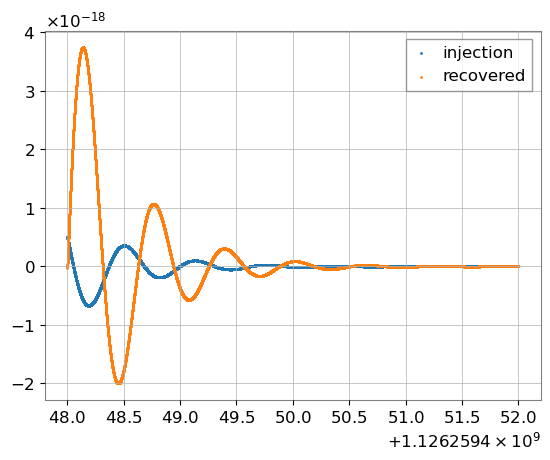

In [ ]:
plt.scatter(time_axis, s0, label='injection', s=1)
plt.scatter(time_axis, s1, label='recovered', s=1)
plt.legend()
plt.show()

In [1]:
import random
import numpy as np

random.seed(0)
N=10000

V = np.array([
    [1, 2],
    [2, 5]])

B = np.linalg.cholesky(V)
A = np.array([1, 2])

# norm() return one number from standard normal distribution
n1 = np.array([random.gauss(0, 1) for _ in range(10000)])
n2 = np.array([random.gauss(0, 1) for _ in range(10000)])
res = np.array([n1, n2]).T.dot(B.T) + A

np.cov(res.T).round()

array([[1., 2.],
       [2., 5.]])

In [3]:
res.shape

(10000, 2)

In [1]:
import numpy as np

In [16]:
x = np.linspace(1, 100, 100)

In [17]:
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [18]:
import matplotlib.pyplot as plt

(0.0, 100.0)

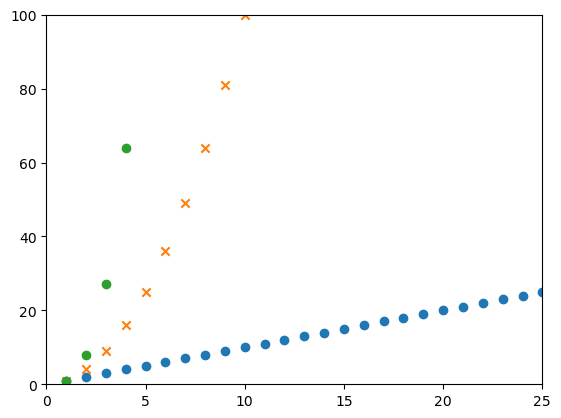

In [27]:
y = x * x
y1 = x*x*x

plt.scatter(x, x)
plt.scatter(x, y, marker='x')
plt.scatter(x, y1, marker='o')
plt.xlim(0, 25)
plt.ylim(0, 100)